In [2]:
import pandas as pd

bank_df = pd.read_csv('bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
from sklearn.preprocessing import MinMaxScaler

bank_df = bank_df.drop('y', axis=1) # y는 범위변환 대상이 아니기 때문에 뺀다.

mc = MinMaxScaler()
mc.fit(bank_df) # MinMaxScaler를 사용해 범위변환용 파라미터를 계산한다.

bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns) # 범위변환의 결과를 데이터 프레임 형식으로 변환한다.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df) # StandardScaler를 사용해 Z변환용 파라미터를 계산한다.

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns) # Z변환 결과를 데이터 프레임 형식으로 변환한다.

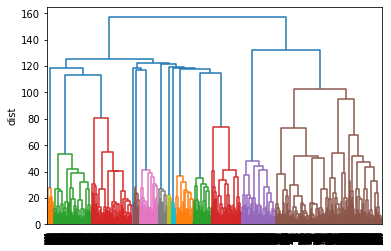

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt # 덴드로그램을 그리기 위한 plt

hcls = linkage(bank_df_sc, metric="euclidean", method="ward") # 계층형 클러스터링
dendrogram(hcls) # 덴드로그램 작성

plt.ylabel('dist') #덴드로그램 그림
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion='distance') # 거리 경계값을 100으로 잡고 데이터를 그룹으로 분할해 ID를 부여한다.
print(cst_group)

[14 14 14 ... 12 12 12]


In [7]:
from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10) # 클러스터 10개로 분할함
cst_group = kcls.fit_predict(bank_df_sc) # bank_df_sc에 대해 클러스터링 적용

print(cst_group)

[4 4 4 ... 6 6 6]


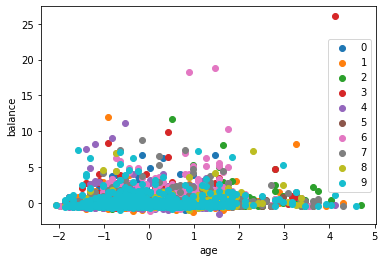

In [8]:
for i in range(10) :
    labels= bank_df_sc[cst_group==i]
    plt.scatter(labels['age'], labels['balance'], label=i)
    
plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [9]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4


In [10]:
print(bank_df_sc['group'].value_counts())

4    1238
1    1096
9     983
7     916
0     753
6     644
8     464
3     429
2     382
5      28
Name: group, dtype: int64


In [11]:
bank_df_sc[bank_df_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,7.530000e+02,753.0
mean,0.145118,0.010830,0.035997,-0.272609,-0.061720,-0.500582,-0.077302,0.171938,-0.350817,-0.252504,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
std,0.927044,1.038651,0.817534,0.999478,0.941257,0.911881,0.998062,1.399619,0.366305,0.313782,...,1.610893e-15,1.277605e-15,4.777132e-15,3.199568e-14,1.402588e-15,6.110285e-15,8.332207e-16,1.110961e-15,1.416475e-15,0.0
min,-1.869332,-0.137148,-0.997156,-1.140627,-0.444540,-1.758049,-0.964517,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
25%,-0.538484,-0.137148,-0.403133,-1.140627,-0.444540,-1.396049,-0.647700,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
50%,0.031879,-0.137148,-0.235371,-1.140627,-0.444540,-0.551381,-0.386793,-0.238367,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
75%,0.887424,-0.137148,0.132792,0.876711,-0.444540,0.293287,0.142478,0.097459,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0
max,2.883695,7.291369,6.759733,0.876711,2.249514,1.741289,8.789708,12.858852,3.648753,2.945362,...,-2.678184e-01,-1.674064e-01,-4.347297e-01,2.843677e+00,-1.002619e-01,-6.621040e-01,-3.202754e-01,-1.349488e-01,-1.120725e-01,0.0


In [12]:
# PCA는 데이터 분산이 최대가 되는 방향으로 새로운 축(제1주성분)을 제시한다. 누적기여율 일정 이상이 될때까지 주성분을 추가해나간다.
# PCA는 기존의 변수를 조합해 다른 변수를 새롭게 작성한다.
from sklearn.decomposition import PCA

pca = PCA(0.80) # 누적기여율 80%가 될 때까지 주성분을 추출한다.
bank_df_pca = pca.fit_transform(bank_df_sc) # bank_df_sc에 PCA를 적용한다.

print(pca.n_components_) # 추출한 주성분 수를 확인한다.
print(bank_df_pca.shape) # 주성분 분석을 적용한 후의 데이터 세트 크기를 알아본다.

16
(6933, 16)


In [14]:
y = pd.read_csv('bank-prep.csv', sep=',')['y']

bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y # 데이터프레임으로 변환한 뒤 y만 추가한다.

print(bank_df_pca.shape)

(6933, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y
0,-0.579890,2.110348,1.525961,-1.246074,1.116318,-0.968500,-0.519140,-0.090659,-0.941843,0.243327,0.236490,1.191104,0.902009,-0.151914,0.028841,0.162105,0
1,-0.607784,2.945436,-2.033375,0.098035,-0.413822,0.473484,-0.177695,-0.584686,-0.257010,0.794770,0.179354,0.508139,-0.160774,0.505778,-0.145532,-0.055284,0
2,-0.565832,3.138552,-0.219045,0.495971,-0.300538,-0.105117,-1.167312,0.402580,-0.336671,0.324714,-0.353810,0.927144,0.230678,0.022013,0.078159,0.086025,0
3,-0.667088,2.304556,0.947033,0.317482,0.249332,1.043947,-0.188993,0.680201,-0.904955,0.034089,-1.708788,3.428012,-0.586704,1.879932,-0.010982,0.612491,0
4,-0.588081,3.033604,-2.519685,0.030025,-0.598783,0.270545,-0.497143,-0.612491,-0.066204,0.893845,0.404143,0.129378,-0.118122,0.211858,-0.117021,-0.136642,0
5,-0.634927,1.531752,1.694066,-1.623466,1.016062,-0.266940,-0.358481,-0.011083,-0.618516,0.091965,0.078831,2.007962,0.458536,0.308924,0.062799,0.296012,0
6,-0.614477,2.946264,1.139959,0.527461,-0.129373,0.349087,-0.448825,0.478200,-0.252471,0.064982,-0.099298,0.604105,0.600693,-0.102299,0.061641,0.001110,0
7,-0.695981,2.915582,1.020908,1.001197,-0.583549,0.349468,-0.671126,-0.291308,-0.530769,0.319459,0.832746,0.766304,0.362859,0.320878,-0.031473,0.071769,0
8,-0.650587,2.449282,0.112874,-0.306425,0.009914,2.217044,1.941595,-0.570572,-0.898336,-1.547916,0.041947,1.035488,0.850132,0.175086,0.061986,0.175751,0
9,-0.669353,2.300285,1.107067,0.304255,0.215023,1.085409,-0.141010,0.680950,-0.788787,0.000799,-1.482530,3.131328,-0.461017,1.648407,0.009011,0.531833,1


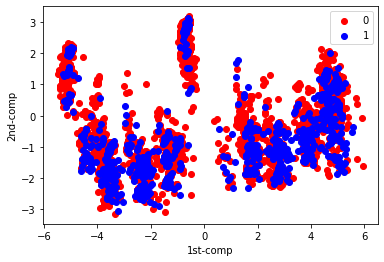

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
 # 쥬피터 노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게 해준다.
bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0) # y가 0인 제1주성분과 제2주성분을 산포도로 작성한다.

bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1) # y가 1인 제1주성분과 제2주성분을 산포도로 작성한다.

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()